# 2014222 - Semester 2 CA-01 -April 2024¶

# Part 3

# Applying the trained model to the NBA dataset

In [1]:
# Utilise Python programming language in order to comply with the requisites of the assessment and perform adequate Machine
# Learning algorithms to discover and deliver insights.

# Import the necessary libraries (Numpy and Pandas) in order to perform data cleansing.
# These are the libraries that are conventionally used as a common practice in order to
# perform mathematical and statistical operations during a data analysis process

import numpy as np
import pandas as pd

# Import Matplotlib and Plotly library in order to perform data visualisation procedures

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# I am using this line of code to see all columns in a wide DataFrame

pd.set_option('display.max_columns', None)

# Using train_test_split and StandardScaler together in a machine learning pipeline
# ensures that the model is trained on a well-prepared dataset,
# leading to better performance and more reliable predictions.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Using Sequential to create a model and Dense for adding layers is a powerful
# and straightforward way to build neural networks in TensorFlow.
# This approach is widely used for a plethora of deep learning tasks where
# complex architectures are not required, providing a great balance between simplicity and functionality.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# I had to install:
#!pip install shap
#!pip install keras-tuner
#!pip install tensorflow
#!pip install --upgrade pip
#pip install keras
#!pip install --upgrade tensorflow

# This combination of imports from TensorFlow and KerasTuner is used to build a neural network model
# (Sequential with Dense layers), optimize its parameters with an efficient optimizer (Adam),
# and fine-tune its hyperparameters (using RandomSearch from KerasTuner)
# to improve performance.
# This process is key to developing high-performing models tailored to specific data sets and tasks.

# from kerastuner.tuners import RandomSearch

from keras_tuner.tuners import RandomSearch
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.calibration import CalibratedClassifierCV

# For a loading the model with Keras

from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout

# Import the warnings module

import warnings

# Ignore all warnings by applying th the 'filterwarnings()'' function and passing the 'ignore' argument

warnings.filterwarnings('ignore')

# Apply the trained model to the NBA dataset

In [2]:
# Loading the NBA dataset

nba_data = pd.read_csv('NBA Dataset CSV C1.csv')

# Defining features again properly as a list of column names

features = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Selecting the features from NBA dataset

X_nba = nba_data[features]

# Preprocess data as per the trained model's requirements

scaler = StandardScaler()

## Loading the NBA trained model

In [3]:
# Loading the NBA trained model

model = load_model('my_nba_predictions_model.keras')

# model = load_model('/Users/geomarmunoz/Semester2024/CA1/my_nba_predictions_model.keras')

# Make predictions
scaler = StandardScaler()
X_nba_scaled = scaler.fit_transform(X_nba)
predictions = model.predict(X_nba_scaled)

# Add the predictions to the NBA DataFrame

nba_data['predicted_efficiency'] = predictions.flatten()

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step


In [4]:
# To see the new predictions column

print(nba_data.head())

      Year       Season_type  PLAYER_ID  RANK           PLAYER     TEAM_ID  \
0  2012-13  Regular%20Season     201142     1     Kevin Durant  1610612760   
1  2012-13  Regular%20Season        977     2      Kobe Bryant  1610612747   
2  2012-13  Regular%20Season       2544     3     LeBron James  1610612748   
3  2012-13  Regular%20Season     201935     4     James Harden  1610612745   
4  2012-13  Regular%20Season       2546     5  Carmelo Anthony  1610612752   

  TEAM  GP   MIN  FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  \
0  OKC  81  3119  731  1433   0.510   139   334    0.416  679  750   0.905   
1  LAL  78  3013  738  1595   0.463   132   407    0.324  525  626   0.839   
2  MIA  76  2877  765  1354   0.565   103   254    0.406  403  535   0.753   
3  HOU  78  2985  585  1337   0.438   179   486    0.368  674  792   0.851   
4  NYK  67  2482  669  1489   0.449   157   414    0.379  425  512   0.830   

   OREB  DREB  REB  AST  STL  BLK  TOV   PF   PTS   EFF  AST_T

In [5]:
# Exporting the DataFrame to a CSV file
# This NBA Dataset will have the column with predicted_efficiency

#nba_data_predic_eff.to_csv('NBA Dataset with predicted_efficiency.csv', index=False)

#print('The CSV file has been created successfully.')

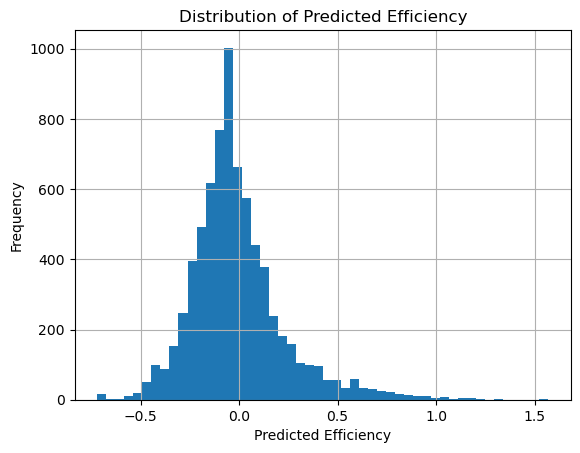

In [6]:
# Visual inspection:
# I am creating a histogram to see the distribution of the predicted values.

nba_data['predicted_efficiency'].hist(bins=50)
plt.xlabel('Predicted Efficiency')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Efficiency')
plt.show()

In [7]:
# To get a statistical summary of the predictions,
# I am using the describe() method.
# This helpful to understand the distribution of the model's predictions.

print(nba_data['predicted_efficiency'].describe())

count    7293.000000
mean       -0.010716
std         0.238690
min        -0.719778
25%        -0.149933
50%        -0.048322
75%         0.083178
max         1.569062
Name: predicted_efficiency, dtype: float64


In [8]:
# I am interested in comparing the actual efficiency (EFF) values against
# The predicted values I am going to print the columns, player, efficiency and the predicted_efficiency

print(nba_data[['PLAYER', 'EFF', 'predicted_efficiency']].head())

            PLAYER   EFF  predicted_efficiency
0     Kevin Durant  2462              0.917146
1      Kobe Bryant  1921              1.037937
2     LeBron James  2446              0.685083
3     James Harden  1872              0.625211
4  Carmelo Anthony  1553              0.987735


### This table shows actual and predicted efficiency scores (EFF) for a selection of NBA players.

**Player Names:** This column identifies each player by name.

**EFF (Efficiency):** This column shows the actual efficiency scores for the players. Efficiency in basketball is a comprehensive statistic that attempts to capture a player's overall impact on the game based on various metrics, including points, rebounds, assists, steals, blocks, turnovers, etc.

**Predicted Efficiency:** This column contains the efficiency scores predicted by your machine learning model based on the input features it was provided (likely player statistics from the season).

### Interpreting Specific Players:

**Kevin Durant:** An actual efficiency of 2462 compared to a predicted efficiency of 0.917. Kevin Durant's efficiency was significantly underestimated by the model.

**Kobe Bryant:** Actual efficiency is 1921, with a predicted efficiency of 1.038. Like with Durant, the prediction is significantly lower, suggesting underestimation.

**LeBron James:** Has an actual efficiency of 2446 but a predicted efficiency of 0.685, another case where the model's prediction is much lower than the actual value.

**James Harden:** Shows an actual efficiency of 1872 and a predicted efficiency of 0.625, indicating the model's prediction is lower than the actual efficiency.

**Carmelo Anthony:** With an actual efficiency of 1553 and a predicted efficiency of 0.988, the model also underestimates his efficiency, though it's closer to 1 compared to others.

### General Observations:

The predicted efficiencies appear to be on a different scale than the actual efficiencies. The model is intended to output efficiencies directly comparable to the actual EFF scores, then it might require recalibration.